## 분류 평가

* TP, FP, FN, TN는 예측 클래스와 실제 클래스의 Positive 결정 값과 Negative 결정 값의 결합에 따라 결정
* 앞문자 True/False는 예측값과 실제값이 같은가/틀린가를 의미하고 뒤 문자 Negative/Positive는 예측 결과 값이 부정/긍정을 의미
* TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 0
* FP는 예측값을 Positive 값 1로 예측했고 실제값은 Negative 값 0
* FN은 예측값을 Negative 값 0으로 예측했고 실제값은 Positive 값 1
* TP는 예측값을 Positive 값 1로 예측했고 실제값 역시 Positive 값 1
* 정확도 = (TP + TN) / ( TP + TN + FP + FN)
* 정밀도 = TP / ( TP + FP)
* 재현율 = TP / ( TP + FN)
* F1 = 2 * ( 정밀도 * 재현율) / (정밀도 + 재현율)
  : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼때 높아짐.
* 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 평가 지표
* 재현율이 중요 지표인 경우는 실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우(ex. 보험사기, 암진단 - 암인데 암이 아니라고 진단하면 FN이 증가하고 재현율이 떨어진다)
* 정밀도가 더 중요한 지표인 사례는 스팸 메일 여부를 판단하는 경우로 스팸 메일이 아닌데 스팸 메일로 분류해서 업무 차질 발생(스팸이 아닌데 스팸으로 분류하면 FP 증가하고 정밀도가 떨어진다)

#### 정밀도/제현율 트레이드오프
* 정밀도 또는 재현율이 특별히 강조돼야 할 경우 분류의 결정 임곗값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 높일 수 있음
* 정밀도와 재현율은 한쪽을 높이면 다른 하나의 수치는 낮아지므로 트레이드오프(Trade-off) 관계임

#### 예측 확률을 반환하는 predict_proba()
* 사이킷런 분류 알고리즘은 예측 데이터가 특정 레이블(결정 클래스 값)에 속하는지를 계산하기 위해 먼저 개별 레이블별로 결정 확률을 구함
* 그리고 예측 확률이 큰 레이블 값으로 예측
* 이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측되었다면 최종 예측은 더 큰 확률을 가진 1로 예측
* 이진 분류에서는 이 임곗값을 0.5로 정하고 이 기준 값보다 확률이 크면 Positive, 작으면 Negative로 결정함
* 사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_prob()를 제공 - 학습이 완료된 사이킷런 Classifier 객체에서 호출
* predict() 메서드와 유사하지만 단지 반환 결과가 예측 결과 클래스값이 아닌 예측 확률 결과임

[과제]
정밀도, 재현율이 중요한 각 케이스를 하나씩 기술하세요.

In [2]:
# 분석용 데이터셋을 재로딩, 학습/검증 데이터 분할 후 학습, 예측 및 평가(lr 사용)
# 평가는 정확도만 적용
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('dataset/tdf.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test,pred)
accuracy_lr

0.8715083798882681

In [9]:
pred_proba = lr_clf.predict_proba(X_test)
pred = lr_clf.predict(X_test)
print('pred_proba()결과 shape:{0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:',pred_proba[:3])
print()
print('pred에서 앞 3개만 샘플로 추출 \n:', pred[:3])
print('pred.reshape(-1,1)에서 앞 3개만 샘플로 추출 \n:', pred.reshape(-1,1)[:3])
print()
pred_proba_result = np.concatenate([pred_proba,pred.reshape(-1,1)],axis=1)
pred_proba_result

pred_proba()결과 shape:(179, 2)
pred_proba array에서 앞 3개만 샘플로 추출 
: [[0.49493622 0.50506378]
 [0.85471758 0.14528242]
 [0.8798258  0.1201742 ]]

pred에서 앞 3개만 샘플로 추출 
: [1 0 0]
pred.reshape(-1,1)에서 앞 3개만 샘플로 추출 
: [[1]
 [0]
 [0]]



array([[0.49493622, 0.50506378, 1.        ],
       [0.85471758, 0.14528242, 0.        ],
       [0.8798258 , 0.1201742 , 0.        ],
       [0.77675701, 0.22324299, 0.        ],
       [0.80564863, 0.19435137, 0.        ],
       [0.80320573, 0.19679427, 0.        ],
       [0.89974359, 0.10025641, 0.        ],
       [0.30105511, 0.69894489, 1.        ],
       [0.83772283, 0.16227717, 0.        ],
       [0.28269896, 0.71730104, 1.        ],
       [0.80928605, 0.19071395, 0.        ],
       [0.91989281, 0.08010719, 0.        ],
       [0.87979422, 0.12020578, 0.        ],
       [0.89951865, 0.10048135, 0.        ],
       [0.63211366, 0.36788634, 0.        ],
       [0.89963507, 0.10036493, 0.        ],
       [0.90981752, 0.09018248, 0.        ],
       [0.79200456, 0.20799544, 0.        ],
       [0.69430525, 0.30569475, 0.        ],
       [0.06487222, 0.93512778, 1.        ],
       [0.71677882, 0.28322118, 0.        ],
       [0.6080785 , 0.3919215 , 0.        ],
       [0.

In [12]:
from sklearn.preprocessing import Binarizer

X=[[1,-1,2],
  [2,0,0],
  [0,1.1,1.2]]
# threshold(임계값) 기준값 보다 같거나 작으면 0, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [14]:
# 생존 확률을 선택해서 임계값 0.5 기준으로 예측
custom_threshold = 0.5
print(pred_proba[0:5])
print()
# 생존 확률 추출 후 2차원 배열로 변환
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
print(pred_proba_1[0:5])
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)
custom_predict[0:5]

[[0.49493622 0.50506378]
 [0.85471758 0.14528242]
 [0.8798258  0.1201742 ]
 [0.77675701 0.22324299]
 [0.80564863 0.19435137]]

[[0.50506378]
 [0.14528242]
 [0.1201742 ]
 [0.22324299]
 [0.19435137]]


array([[1.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
confusion_matrix, f1_score

def get_clf_eval(y_test,pred):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    print('오차행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, \
    f1 score:{3:.4f}'.format(accuracy,precision,recall,f1))
    
get_clf_eval(y_test,custom_predict)

오차행렬
[[110   8]
 [ 15  46]]
정확도:0.8715, 정밀도:0.8519, 재현율:0.7541,     f1 score:0.8000


In [19]:
# 임계값을 내리면 Positive 예측을 많이 할 수 있음
custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

오차행렬
[[106  12]
 [  9  52]]
정확도:0.8827, 정밀도:0.8125, 재현율:0.8525,     f1 score:0.8320


In [ ]:
정밀도 = TP/(TP+FP)
재현율 = TP/(TP+FN)

In [ ]:
# [과제]  수작업으로 계산해서 아래 지표들을 출력하세요

print('정확도:',  )
정밀도:
재현율:
f1 score:

In [ ]:
정확도: 0.8715
정밀도: 0.8519
재현율: 0.7541
f1 score: 0.8000

In [22]:
# 테스트를 수행할 모든 임계값을 리스트 객체로 저장
thresholds = [0.4,0.45,0.5,0.55,0.6]

def get_eval_by_threshold(y_test,pred_proba_c1,thresholds):
    # thresholds list 객체내의 값을 차례로 iteration하면서 평가 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임계값:',custom_threshold)
        
        get_clf_eval(y_test,custom_predict)
        print()
get_eval_by_threshold(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값: 0.4
오차행렬
[[106  12]
 [  9  52]]
정확도:0.8827, 정밀도:0.8125, 재현율:0.8525,     f1 score:0.8320

임계값: 0.45
오차행렬
[[108  10]
 [ 10  51]]
정확도:0.8883, 정밀도:0.8361, 재현율:0.8361,     f1 score:0.8361

임계값: 0.5
오차행렬
[[110   8]
 [ 15  46]]
정확도:0.8715, 정밀도:0.8519, 재현율:0.7541,     f1 score:0.8000

임계값: 0.55
오차행렬
[[112   6]
 [ 17  44]]
정확도:0.8715, 정밀도:0.8800, 재현율:0.7213,     f1 score:0.7928

임계값: 0.6
오차행렬
[[114   4]
 [ 22  39]]
정확도:0.8547, 정밀도:0.9070, 재현율:0.6393,     f1 score:0.7500



In [28]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출
pred_proba_class1 = lr_clf.predict_proba(X_test)[:,1]

# 실제값 데이터셋과 레이블값이 1일때의 예측확률을 precision_recall_curve 인자로 입력
precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_class1)
print(thresholds.shape)

thr_index = np.arange(0,thresholds.shape[0],15)
print(thr_index)
print('임계값:',np.round(thresholds[thr_index],2))

# 15 step 단위의 추출된 임계값에 따른 정밀도와 재현율 
print('정밀도:',np.round(precisions[thr_index],3))
print('재현율:',np.round(recalls[thr_index],3))

(140,)
[  0  15  30  45  60  75  90 105 120 135]
임계값: [0.09 0.1  0.14 0.19 0.28 0.39 0.51 0.63 0.86 0.94]
정밀도: [0.365 0.407 0.46  0.519 0.628 0.768 0.868 0.946 0.952 1.   ]
재현율: [1.    0.967 0.951 0.902 0.885 0.869 0.754 0.574 0.328 0.082]


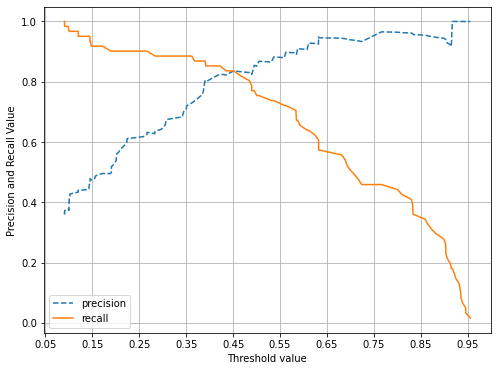

In [32]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test,pred_proba_c1):
    precision,recalls,thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary=thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', \
             label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    # x축 y축 label과 scale을 0.1단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    # x축 y축 label과 legend, grid 설정
    plt.xlabel('Threshold value');plt.ylabel('Precision and Recall Value')
    plt.legend();plt.grid()
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])